In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:, 2:]
y = iris.target

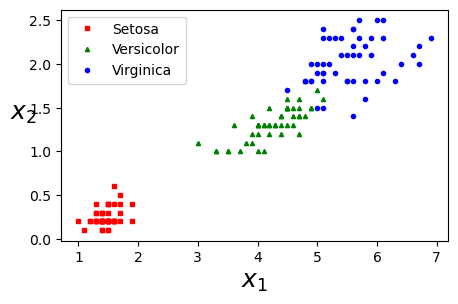

In [5]:
plt.figure(figsize=(5, 3))
plt.plot(x[y==0, 0],x[y==0, 1], 'rs', markersize=3, label='Setosa')
plt.plot(x[y==1, 0],x[y==1, 1], 'g^', markersize=3, label='Versicolor')
plt.plot(x[y==2, 0],x[y==2, 1], 'bo', markersize=3, label='Virginica')

plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18, rotation=0)

plt.show()

In [6]:
#DecisionTreeClassifier()

from sklearn.tree import DecisionTreeClassifier

treeClf = DecisionTreeClassifier(max_depth=2, random_state=2)
treeClf.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [7]:
treeClf.score(x, y)

0.96

In [11]:
irisTarget = iris.target_names.tolist()   #將以下會使用到的資料從array轉list

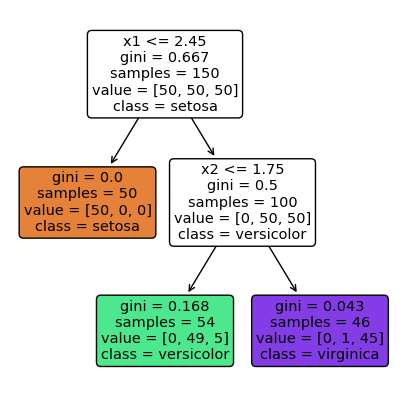

In [13]:
#Tree plot
#class_names只能匯入list的資料，'iris.target_names'是一個array，必須先轉成list
from sklearn import tree
plt.figure(figsize=(5, 5))
tree.plot_tree(treeClf, feature_names=['x1', 'x2'], class_names=irisTarget, rounded=True, filled=True)

plt.savefig('tree.pdf')
plt.show()

In [14]:
#Predict/Feature importances

treeClf.predict([[5, 1.5]])

array([1])

In [15]:
treeClf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [16]:
treeClf.feature_importances_

array([0.56199095, 0.43800905])

In [21]:
#Decision boundary

from matplotlib.colors import ListedColormap

def plotDecisionBoundary(clf, x, y, axes=[0, 7.5, 0, 3]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    yPred = clf.predict(xNew).reshape(x1.shape)
    
    customCmap = ListedColormap(['red', 'green', 'purple'])
    plt.contourf(x1, x2, yPred, cmap=customCmap, alpha=.2)
    
    plt.plot(x[y==0, 0], x[y==0, 1], 'rs', markersize=3, label='Setosa')
    plt.plot(x[y==1, 0], x[y==1, 1], 'g^', markersize=3, label='Versicolor')
    plt.plot(x[y==2, 0], x[y==2, 1], 'bo', markersize=3, label='Virginica')
    
    plt.legend(loc='upper left')
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18, rotation=0)

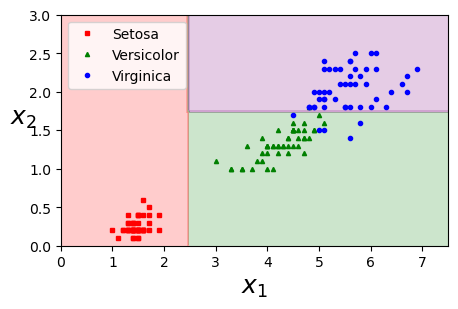

In [22]:
plt.figure(figsize=(5,3))
plotDecisionBoundary(treeClf, x, y)
plt.show()